# HW4 - PCA & KNN Classifier
##### 負責助教: 陳亮宇 catchingfire80@gmail.com

本次作業將使用MNIST手寫數字資料集，同學將在本次作業中利用PCA做降維，並使用KNN進行手寫數字的辨識

## 資料集

本資料集包含了訓練60000筆加測試10000筆的手寫數字圖片，其中每筆資料為$28\times28$的灰階圖片，標註則為0-9的數字

更多關於此資料集的資訊可以參考[此網站](http://yann.lecun.com/exdb/mnist/)

---
## 評分標準
* 上課繳交：25%
    * 在當天 16:20 前上傳至 new E3 作業，請將以下打包成 .zip 上傳：
        * 程式原始檔 (.ipynb）
        * 程式 .html 檔
* 程式分數：75%
    * 於一週內完成並上傳至 new E3

#### 注意：最終學期成績將視全班原始成績做調整
---

#### 姓名：李天寧
#### 學號：109705002

## Packages that Might Be Used

In [8]:
import os
import struct
import numpy as np
from array import array as pyarray
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
    * [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors_graph)
    * [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    * [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

## Load Data - 10%
1. 請使用提供的 load_mnist function ([來源](https://gist.github.com/mfathirirhas/f24d61d134b014da029a))，分別讀出training set和testing set的圖片和label，並印出4個變數分別的shape - 5%

In [80]:
def load_mnist(dataset="training", digits=np.arange(10), path=".", size = 60000):
    if dataset == "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = size #int(len(ind) * size/100.)
    images = np.zeros((N, rows, cols), dtype=np.uint8)
    labels = np.zeros((N, 1), dtype=np.int8)
    for i in range(N): #int(len(ind) * size/100.)):
        images[i] = np.array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ])\
            .reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    labels = [label[0] for label in labels]
    return np.array(images), np.array(labels)

In [81]:
training_data,training_label = load_mnist(dataset="training", digits=np.arange(10), path="data", size = 60000)
testing_data,testing_label = load_mnist(dataset="testing", digits=np.arange(10), path="data", size = 60000)
print("training set data shape: ",end='')
print(training_data.shape)
print("training set label shape: ",end='')
print(training_label.shape)
print("testing set data shape: ",end='')
print(testing_data.shape)
print("testing set label shape: ",end='')
print(testing_label.shape)

training set data shape: (60000, 28, 28)
training set label shape: (60000,)
testing set data shape: (10000, 28, 28)
testing set label shape: (10000,)


2. 印出training set中index為384的手寫數字的圖片 - 5%

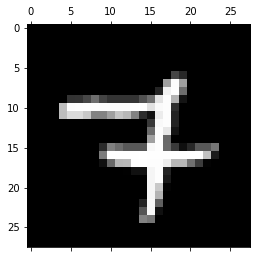

In [82]:
plt.matshow(training_data[384],cmap = plt.get_cmap('gray'))
plt.show()

## Preprocessing - 10%
將資料整理成PCA可以處理的形式，即將圖片$28\times28$的2維攤平成784的1維資料

In [94]:
flt_training_data = training_data.reshape(60000,784)
flt_testing_data = testing_data.reshape(10000,784)
print("training set data shape: ",end='')
print(flt_training_data.shape)
print("testing set data shape: ",end='')
print(flt_testing_data.shape)

training set data shape: (60000, 784)
testing set data shape: (10000, 784)


## PCA - 30%
1. 自行選擇目標維度，並利用PCA對training set和testing set進行降維 -10%

In [128]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(flt_training_data)
pca.fit(flt_training_data)
print("training set shape after pca: ",end='')
print(pca.transform(flt_training_data).shape)
print("testing set shape after pca: ",end='')
print(pca.transform(flt_testing_data).shape)

training set shape after pca: (60000, 10)
testing set shape after pca: (10000, 10)


2. 將PCA算出的各維度的eigenvectors畫成圖片 - 10%

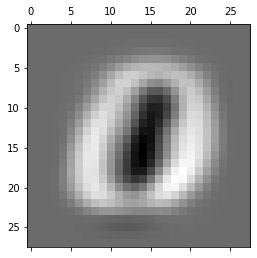

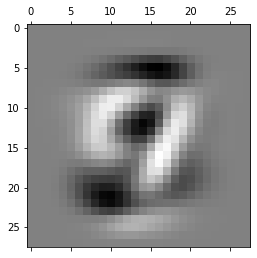

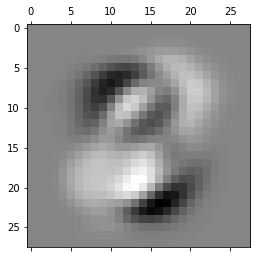

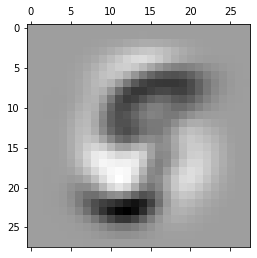

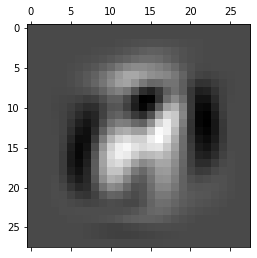

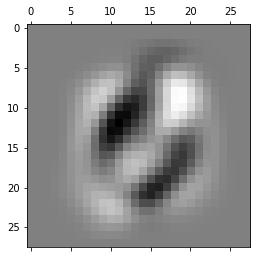

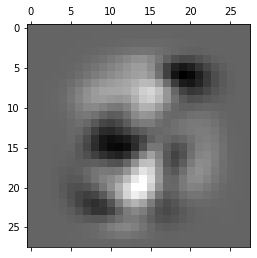

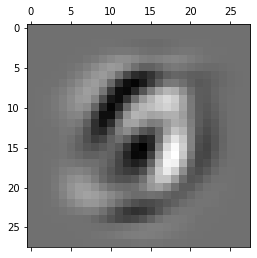

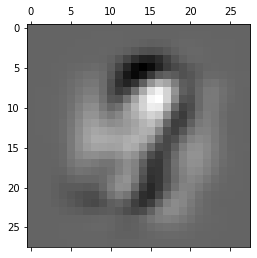

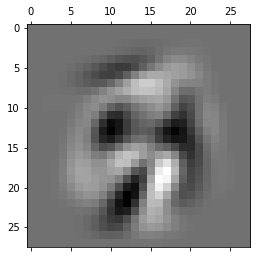

In [129]:
eigenvectors = pca.components_.reshape((n_components, 28, 28))
for i in range(10):
    plt.matshow(eigenvectors[i],cmap = plt.get_cmap('gray'))
    plt.show()

### 問題:
請簡述以下問題，將ans替換為你的答案
* 這些由eigenvectors畫出來的圖代表什麼意思? - 10%
    * 不同n_components設定下的區間圖

## KNN - 30%
自行選擇K的大小，並利用提供的plot_confusion_matrix function ([來源](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)) 畫出測試資料集的confusion matrix及利用classification_report印出各分類的精準度

In [130]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [131]:
knn = KNeighborsClassifier(n_neighbors=10)
print(classification_report(flt_testing_data, flt_training_data,target_names = knn))
plot_confusion_matrix()


ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]

## 自製測試資料 - 20%
1. 使用[photopea](https://www.photopea.com/)或功能類似的網頁或軟體，創建一個$28px\times28px$的圖片，並在圖上手寫一個數字並讀入 - 10%

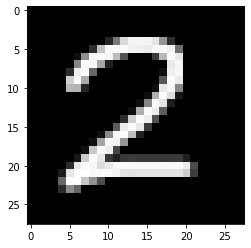

In [10]:
'''Your Codes Here'''

2. 將資料攤平後利用pca進行降維，並利用訓練好的knn模型進行預測，步驟皆與上面的相同 - 10%

In [11]:
'''Your Codes Here'''

predict answer: 2


## 有沒有什麼想對助教說的話?

![](https://i.makeagif.com/media/11-17-2020/Y16lVD.gif)